In [1]:
import numpy as np 
import torch 
import torch.nn as nn 
import torch.nn.functional as F
from convlstm import *
from topple import stabilize, create_visualization

data = np.load('50x50topdata.npz')
testtarget = torch.tensor(data['arr_0'][:,:,1728:].reshape(1, 50, 50)).float()
testdata = data['arr_0'][:,:,:1728]

testdata = torch.tensor(testdata.reshape(1, 1728,1, 50, 50))



class conv(nn.Module):

    def __init__(self):
        super().__init__()

        self.conv = ConvLSTM(1, 1, (3,3), 1, True)
        self.ReLU1 = nn.ReLU()
        
    def forward(self, x):
        
        _, x = self.conv(x)
        x = self.ReLU1(x[0][0])
        x = x.view(1, 1, 50, 50)
        
        return(x)
    


model = conv()
lossf_n = nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr = 0.01)
data = np.array([])












In [2]:


for i in range(100):

    optim.zero_grad()
    output = model(testdata)
    loss = lossf_n(output, testtarget)
    loss.backward()
    optim.step()
    if i % 10 == 0:
        print(f"{i}: {loss}")
        accuracy = torch.sum((torch.round(output) == testtarget)) / 2500
        data = np.append(data, accuracy.item())
        
        




c:\Users\tkoti\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1, 50, 50])) that is different to the input size (torch.Size([1, 1, 50, 50])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0: 4.405854225158691
10: 2.660324811935425
20: 2.2326717376708984
30: 2.1629762649536133
40: 2.1453802585601807
50: 2.1386780738830566
60: 2.1352643966674805
70: 2.1331069469451904
80: 2.1315276622772217
90: 2.1302688121795654


In [3]:
import matplotlib.pyplot as plt

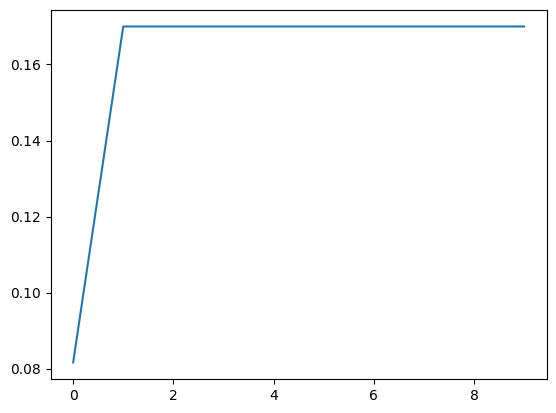

In [4]:
plt.plot(data)
plt.show()

tensor(0.1700)
